This project aims at developing a machine-learning algorithm and predict if a certain mushroom is edible or poisonous by its specifications like cap shape, cap color, gill color, etc.

In [1]:
# IMPORT ALL THE REQUIRED LIBRARY 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Now we will import our data
data=pd.read_csv("D:\mushrooms.csv")

In [4]:
data

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


Data is having 8124 rows and 23 columns.

Attribute Information: (classes: edible=e, poisonous=p)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   type                      8124 non-null   object
 1   cap_shape                 8124 non-null   object
 2   cap_surface               8124 non-null   object
 3   cap_color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill_attachment           8124 non-null   object
 7   gill_spacing              8124 non-null   object
 8   gill_size                 8124 non-null   object
 9   gill_color                8124 non-null   object
 10  stalk_shape               8124 non-null   object
 11  stalk_root                8124 non-null   object
 12  stalk_surface_above_ring  8124 non-null   object
 13  stalk_surface_below_ring  8124 non-null   object
 14  stalk_color_above_ring  

Here we can see, all the columns having object data type. As the data is object type we will use encoder to encode the value.

In [6]:
data.isnull().sum()

type                        0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
dtype: int64

All the columns filled with the data, no column have null value. so we can proceed futher analysis.

We can Visualize it using heatmap.

<Axes: >

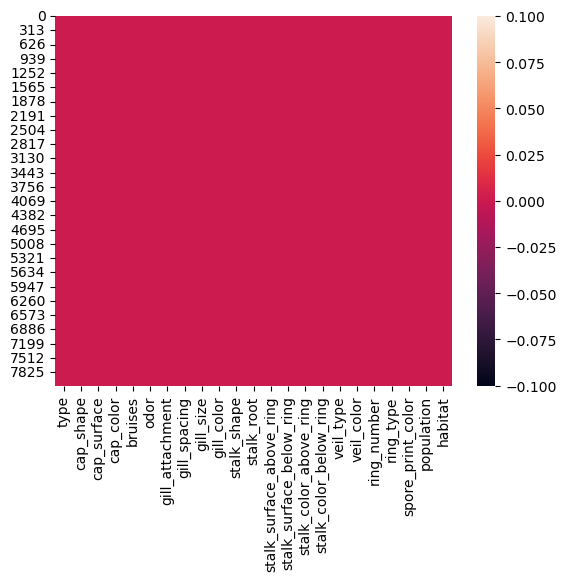

In [7]:
sns.heatmap(data.isnull())

<Axes: xlabel='type', ylabel='count'>

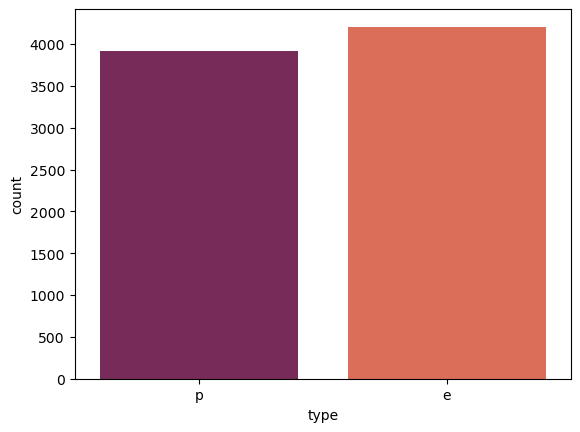

In [9]:
data.value_counts(['type'])

type
e       4208
p       3916
Name: count, dtype: int64

As our data is almost Balanced. So no need to balance the data.

In [10]:
data.dtypes

type                        object
cap_shape                   object
cap_surface                 object
cap_color                   object
bruises                     object
odor                        object
gill_attachment             object
gill_spacing                object
gill_size                   object
gill_color                  object
stalk_shape                 object
stalk_root                  object
stalk_surface_above_ring    object
stalk_surface_below_ring    object
stalk_color_above_ring      object
stalk_color_below_ring      object
veil_type                   object
veil_color                  object
ring_number                 object
ring_type                   object
spore_print_color           object
population                  object
habitat                     object
dtype: object

here we can see our data type is objective we need to encode the data before going for futher steps of analysis.

In [11]:
from sklearn.preprocessing import LabelEncoder
def label_encoded(x):
    le = LabelEncoder()
    le.fit(x)
    print(x.name, le.classes_)
    return le.transform(x)

Here we used made the funtion for encoding out data. We used LabelEncoder for this.

In [12]:
for col in data.columns:
    data[str(col)] = label_encoded(data[str(col)])

type ['e' 'p']
cap_shape ['b' 'c' 'f' 'k' 's' 'x']
cap_surface ['f' 'g' 's' 'y']
cap_color ['b' 'c' 'e' 'g' 'n' 'p' 'r' 'u' 'w' 'y']
bruises ['f' 't']
odor ['a' 'c' 'f' 'l' 'm' 'n' 'p' 's' 'y']
gill_attachment ['a' 'f']
gill_spacing ['c' 'w']
gill_size ['b' 'n']
gill_color ['b' 'e' 'g' 'h' 'k' 'n' 'o' 'p' 'r' 'u' 'w' 'y']
stalk_shape ['e' 't']
stalk_root ['?' 'b' 'c' 'e' 'r']
stalk_surface_above_ring ['f' 'k' 's' 'y']
stalk_surface_below_ring ['f' 'k' 's' 'y']
stalk_color_above_ring ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
stalk_color_below_ring ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
veil_type ['p']
veil_color ['n' 'o' 'w' 'y']
ring_number ['n' 'o' 't']
ring_type ['e' 'f' 'l' 'n' 'p']
spore_print_color ['b' 'h' 'k' 'n' 'o' 'r' 'u' 'w' 'y']
population ['a' 'c' 'n' 's' 'v' 'y']
habitat ['d' 'g' 'l' 'm' 'p' 'u' 'w']


In [13]:
data.head()

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [14]:
data.columns

Index(['type', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat'],
      dtype='object')

In [15]:
data.corr()

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
type,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap_shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap_surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap_color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill_attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill_spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill_size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill_color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


In [ ]:
We can Visualize the correlation using Heatmap. as follow

<Axes: >

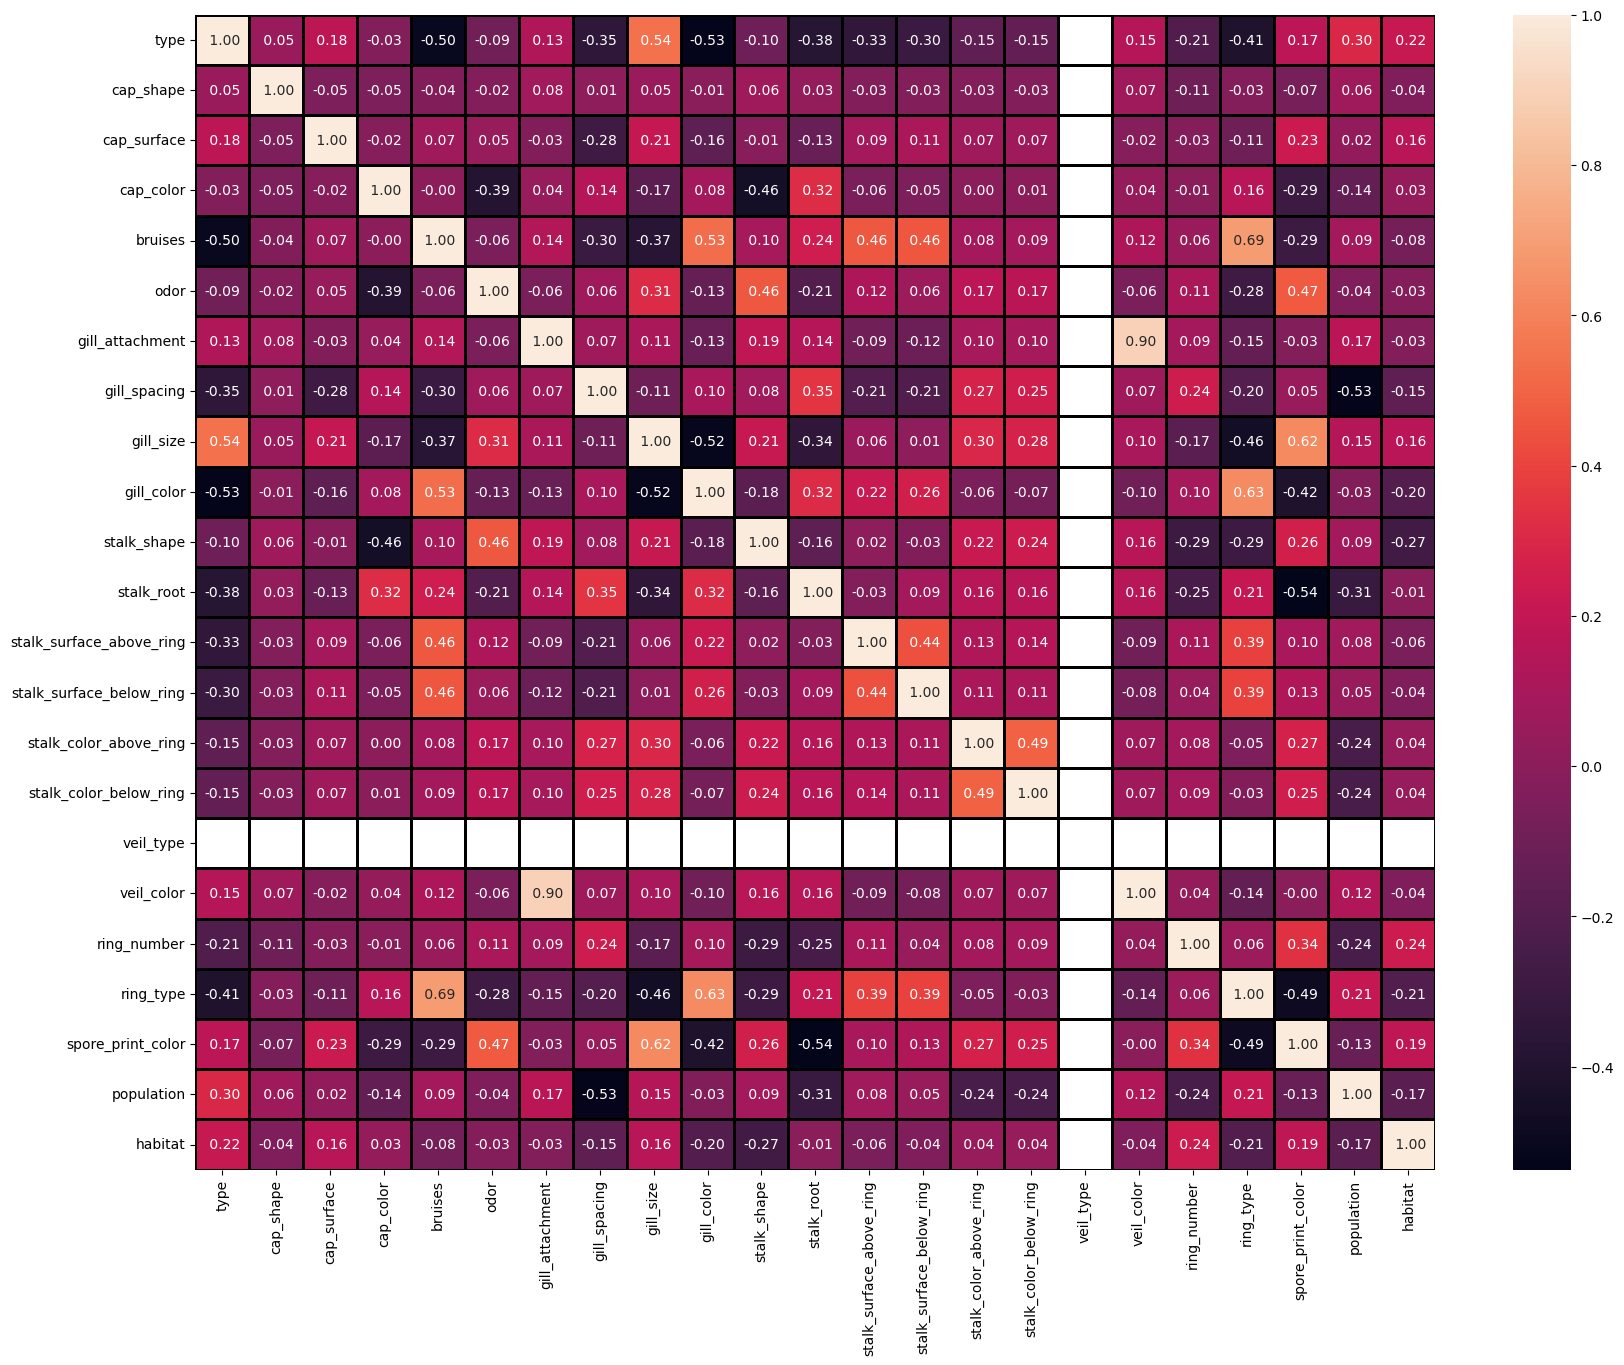

In [16]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(), annot=True, linewidths=1,linecolor='black',fmt=' .2f')

Here we can see vell-type have no effect on our target column, so we can drop that column.

In [17]:
data.head(10)

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
5,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1
6,0,0,2,8,1,0,1,0,0,2,...,2,7,7,0,2,1,4,2,2,3
7,0,0,3,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,3,3
8,1,5,3,8,1,6,1,0,1,7,...,2,7,7,0,2,1,4,2,4,1
9,0,0,2,9,1,0,1,0,0,2,...,2,7,7,0,2,1,4,2,3,3


In [18]:
data=data.drop(['veil_type'],axis=1)

In [19]:
data.head(5)

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


Since the outcome has only two variable we will use binary classification model.

In [20]:
# Now split data in dependent and independent variables
x=data.iloc[:,1:]
y=data.iloc[:,-22]

In [21]:
x.shape

(8124, 21)

In [22]:
y.shape

(8124,)

In [23]:
y.head(10)

0    1
1    0
2    0
3    1
4    0
5    0
6    0
7    0
8    1
9    0
Name: type, dtype: int32

In [24]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
lr=LogisticRegression()
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Here we have imported all required training models, we check the best fit model.

In [25]:
for i in range(0,1000):
    x_train, x_test, y_train, y_test= train_test_split(x,y,random_state= i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train= lr.predict(x_train)
    pred_test= lr.predict(x_test)
    if round (accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At Random state",i, "The model perform very well")
        print("At random State:",i)
        print("Training r2_score",accuracy_score(y_train,pred_train)*100)
        print("testing r2 score ",accuracy_score(y_test,pred_test)*100)

At Random state 10 The model perform very well
At random State: 10
Training r2_score 95.24542237267272
testing r2 score  95.19999999999999
At Random state 18 The model perform very well
At random State: 18
Training r2_score 95.30697030312356
testing r2 score  95.26153846153846
At Random state 28 The model perform very well
At random State: 28
Training r2_score 94.99923065086936
testing r2 score  95.01538461538462
At Random state 34 The model perform very well
At random State: 34
Training r2_score 95.33774426834898
testing r2 score  95.26153846153846
At Random state 36 The model perform very well
At random State: 36
Training r2_score 94.8915217725804
testing r2 score  94.89230769230768
At Random state 53 The model perform very well
At random State: 53
Training r2_score 95.09155254654561
testing r2 score  95.07692307692308
At Random state 54 The model perform very well
At random State: 54
Training r2_score 95.15310047699647
testing r2 score  95.19999999999999
At Random state 117 The mode

At random State: 210

Training r2_score 95.56854900753962

testing r2 score 95.56923076923077

At random state 210, we are get better r2 score.

In [26]:
x_train, x_test, y_train, y_test= train_test_split(x,y,random_state=210,test_size=0.20)

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.52      0.53      0.53       844
           1       0.48      0.46      0.47       781

    accuracy                           0.50      1625
   macro avg       0.50      0.50      0.50      1625
weighted avg       0.50      0.50      0.50      1625



In [28]:
pred_lr = lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_lr)
for j in range(2,10):
    lsscore= cross_val_score(lr,x,y,cv=j)
    lsc=lsscore.mean()
    print("at cv:-", j)
    print("Cross Validation scre is:-",lsc*100)
    print("Accuracy Score:-", lss*100)
    print("\n")

at cv:- 2
Cross Validation scre is:- 81.29000492368291
Accuracy Score:- 94.95384615384616


at cv:- 3
Cross Validation scre is:- 81.25307730182176
Accuracy Score:- 94.95384615384616


at cv:- 4
Cross Validation scre is:- 82.87789266371246
Accuracy Score:- 94.95384615384616


at cv:- 5
Cross Validation scre is:- 83.93488442591892
Accuracy Score:- 94.95384615384616


at cv:- 6
Cross Validation scre is:- 87.87543082225504
Accuracy Score:- 94.95384615384616


at cv:- 7
Cross Validation scre is:- 88.36851830636915
Accuracy Score:- 94.95384615384616


at cv:- 8
Cross Validation scre is:- 86.70541047670766
Accuracy Score:- 94.95384615384616


at cv:- 9
Cross Validation scre is:- 87.418672586001
Accuracy Score:- 94.95384615384616




at cv:- 3

Cross Validation scre is:- 81.12998522895126

Accuracy Score:- 95.19999999999999

In [29]:
lssscore_selected=cross_val_score(lr,x,y,cv=3).mean()
print("The cv score is: ", lssscore_selected,"\nThe accuracy score is: ", lss)

The cv score is:  0.8125307730182176 
The accuracy score is:  0.9495384615384616


In [30]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [31]:
Model= [LogisticRegression(),RandomForestClassifier(),GaussianNB(),DecisionTreeClassifier(),SVC()]

for m in Model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of', m, 'is:')
    print (accuracy_score(y_test,predm))
    print (confusion_matrix(y_test,predm))
    print (classification_report(y_test,predm))
    print('\n')

Accuracy score of LogisticRegression() is:
0.9556923076923077
[[804  40]
 [ 32 749]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       844
           1       0.95      0.96      0.95       781

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



Accuracy score of RandomForestClassifier() is:
1.0
[[844   0]
 [  0 781]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       844
           1       1.00      1.00      1.00       781

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



Accuracy score of GaussianNB() is:
0.9243076923076923
[[774  70]
 [ 53 728]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       8

acuracy score
[0.9556923076923077, 1.0, 0.9243076923076923, 1.0, 0.9932307692307693]
RandomForestClassifier()=1.0

DecisionTreeClassifier() =1.0

Here all the three performing well so we can save any one model.

In [37]:
dtc= DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)

dtcpred=dtc.predict(x_test)
print(accuracy_score(y_test,dtcpred ))
print(confusion_matrix(y_test,dtcpred ))
print(classification_report(y_test,dtcpred ))

1.0
[[844   0]
 [  0 781]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       844
           1       1.00      1.00      1.00       781

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



AUC ROC Curve:

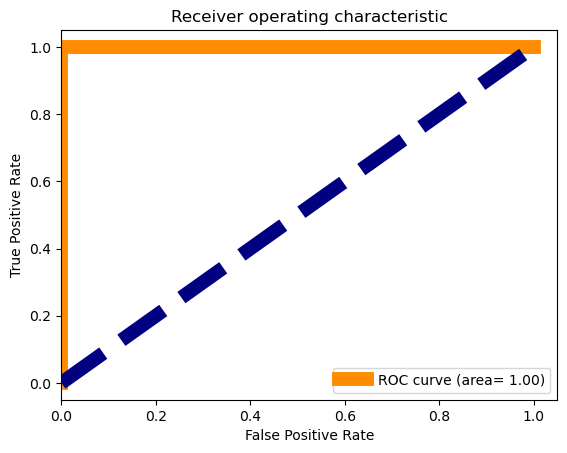

In [38]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds= roc_curve(dtcpred, y_test)
roc_auc= auc(fpr, tpr)

plt.figure()
plt.plot(fpr,tpr, color='darkorange', lw=10,label='ROC curve (area= %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color ='navy', lw=10, linestyle= '--')
plt.xlim([0.0, 1.0])
plt.xlim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Now Saving best Model

In [39]:
import pickle
filename='Mushroom_Pred.pkl'
pickle.dump(dtc,open(filename,'wb'))

Conclusion

In [40]:
import numpy as np
a=np.array(y_test)
predicted= np.array(dtc.predict(x_test))
df_com= pd.DataFrame({'original':a, 'predicted':predicted}, index= range(len(a)))
df_com

,original,predicted
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1620,0,0
1621,0,0
1622,0,0
1623,0,0
